 **RESEARCH PAPER TITLE : Predicting the compressive strength of concrete with fly ash admixture
using machine learning algorithms**

# **LINEAR REGRESSION ANALYSIS**

In [108]:
# Import Python Libraries
import pandas as pd
import numpy as np
# Importing Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Import Filter Warning Library
import warnings
warnings.filterwarnings('ignore')

In [109]:
# Import Dataset 

data = pd.read_csv('Research.csv')
data

,Cement,Fly_Ash,Water,Superplasticizer,Coarse_Agg,Fine_Agg,Age,Strength
0,185.7,101.5,166.9,7.5,1006.4,905.4,90,38.28
1,170.7,127.4,161.8,7.8,1090.0,798.5,3,17.11
2,180.7,127.4,166.1,7.8,1090.0,798.6,14,23.34
3,160.7,127.4,162.1,7.8,1090.0,804.0,28,27.41
4,242.1,125.6,184.3,5.7,1057.6,779.3,14,21.91
...,...,...,...,...,...,...,...,...
93,298.1,124.6,189.4,6.1,879.0,815.0,28,41.64
94,318.9,124.8,212.7,5.7,860.5,725.0,28,36.09
95,355.9,124.5,196.3,11.0,801.4,769.0,28,36.27
96,199.8,124.8,185.4,12.6,849.3,856.5,28,18.01


In [110]:
# Information about the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            98 non-null     float64
 1   Fly_Ash           98 non-null     float64
 2   Water             98 non-null     float64
 3   Superplasticizer  98 non-null     float64
 4   Coarse_Agg        98 non-null     float64
 5   Fine_Agg          98 non-null     float64
 6   Age               98 non-null     int64  
 7   Strength          98 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 6.2 KB


In [111]:
# Description of the Dataset
data.describe()

,Cement,Fly_Ash,Water,Superplasticizer,Coarse_Agg,Fine_Agg,Age,Strength
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,241.362245,123.878571,178.689796,6.319388,1002.237755,794.554082,33.785714,30.551531
std,55.849428,10.229412,18.181510,4.936142,71.699819,46.206665,29.097153,13.007149
min,136.100000,92.100000,141.100000,0.000000,801.000000,687.000000,3.000000,9.490000
25%,196.425000,124.600000,162.525000,0.000000,962.400000,763.625000,14.000000,20.062500
50%,230.350000,124.800000,184.200000,6.700000,1014.850000,794.900000,28.000000,27.515000
75%,290.150000,124.800000,191.750000,10.650000,1055.600000,810.700000,28.000000,40.005000
max,376.000000,168.300000,220.500000,18.000000,1118.000000,905.400000,90.000000,72.110000


In [112]:
#
from sklearn import preprocessing
df = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(data),columns=data.columns)
df

,Cement,Fly_Ash,Water,Superplasticizer,Coarse_Agg,Fine_Agg,Age,Strength
0,0.206753,0.123360,0.324937,0.416667,0.647950,1.000000,1.000000,0.459757
1,0.144227,0.463255,0.260705,0.433333,0.911672,0.510531,0.000000,0.121686
2,0.185911,0.463255,0.314861,0.433333,0.911672,0.510989,0.126437,0.221175
3,0.102543,0.463255,0.264484,0.433333,0.911672,0.535714,0.287356,0.286171
4,0.441851,0.439633,0.544081,0.316667,0.809464,0.422619,0.126437,0.198339
...,...,...,...,...,...,...,...,...
93,0.675281,0.426509,0.608312,0.338889,0.246057,0.586081,0.287356,0.513414
94,0.761984,0.429134,0.901763,0.316667,0.187697,0.173993,0.287356,0.424784
95,0.916215,0.425197,0.695214,0.611111,0.001262,0.375458,0.287356,0.427659
96,0.265527,0.429134,0.557935,0.700000,0.152366,0.776099,0.287356,0.136059


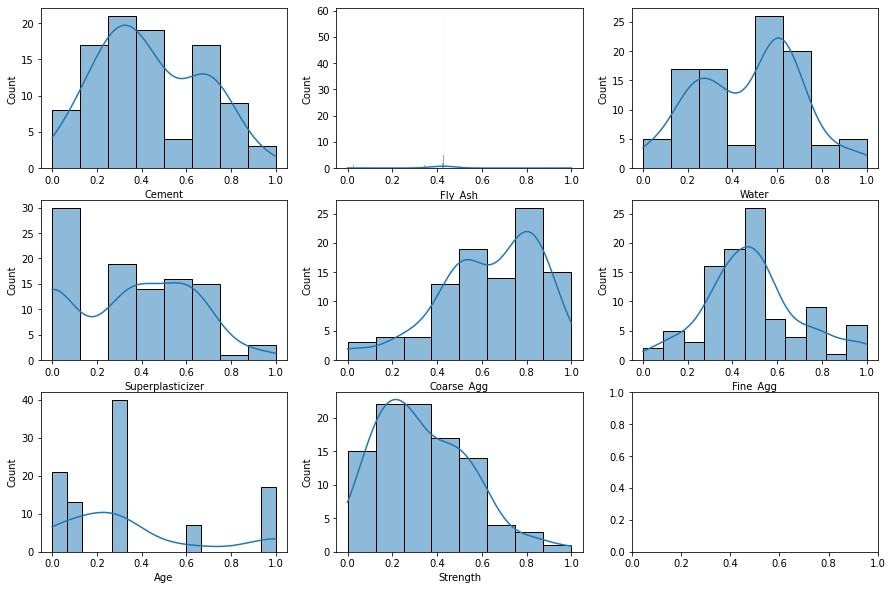

In [113]:
# EDA :- Exploratory Data Analysis

fig,axes = plt.subplots(3,3,figsize = (15,10),facecolor = 'white')
sns.histplot(ax = axes[0,0],data = df.Cement,kde = True)
sns.histplot(ax = axes[0,1],data = df.Fly_Ash,kde = True)
sns.histplot(ax = axes[0,2],data = df.Water,kde = True)
sns.histplot(ax = axes[1,0],data = df.Superplasticizer,kde = True)
sns.histplot(ax = axes[1,1],data = df.Coarse_Agg ,kde = True)
sns.histplot(ax = axes[1,2],data = df.Fine_Agg ,kde = True)
sns.histplot(ax = axes[2,0],data = df.Age ,kde = True)
sns.histplot(ax = axes[2,1],data = df.Strength ,kde = True)
plt.show()

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [115]:
df.columns

Index(['Cement', 'Fly_Ash', 'Water', 'Superplasticizer', 'Coarse_Agg',
       'Fine_Agg', 'Age', 'Strength'],
      dtype='object')

In [116]:
X = df[['Cement', 'Water', 'Superplasticizer', 'Coarse_Agg',
       'Fine_Agg', 'Age']].assign(const=1)
y = df[['Strength']] 

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [118]:
reg = LinearRegression().fit(X_train, y_train)

In [119]:
reg.score(X_train, y_train)

0.7366509708139659

In [120]:
reg.score(X_test, y_test)

0.6466172581786449

In [121]:
y_pred = reg.predict(X_test)

<Axes: ylabel='Density'>

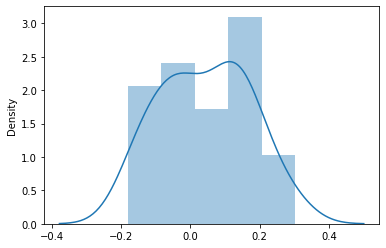

In [122]:
sns.distplot(y_test-y_pred,kde= True)

# **MACHINE LEARNING RESULTS USING STATSMODELING**

In [123]:
import statsmodels.api as sm

result2 = sm.OLS(y,X).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Strength   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     38.48
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           6.29e-23
Time:                        17:27:34   Log-Likelihood:                 77.363
No. Observations:                  98   AIC:                            -140.7
Df Residuals:                      91   BIC:                            -122.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Cement               0.3095      0.085      3.646      0.000       0.141       0.478
Water               -0.8516      0.082    -10.421      0.000      -1.014      -0.689
Superplasticizer    -0.1750      0.058     -3.017      0.003      -0.290      -0.060
Coarse_Agg          -0.3477      0.072     -4.862      0.000      -0.490      -0.206
Fine_Agg            -0.2028      0.066     -3.075      0.003      -0.334      -0.072
Age                  0.3619      0.035     10.358      0.000       0.293       0.431
const                0.8577      0.117      7.350      0.000       0.626       1.090
==============================================================================
Omnibus:                        0.786   Durbin-Watson:                   1.588
Prob(Omnibus):                  0.675   Jarque-Bera (JB):                0.897
Skew:                           0.141   Prob(JB):                        0.639
Kurtosis:                       2.626   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""